<a href="https://colab.research.google.com/github/Yahia-M/Car-purchase-Amount/blob/master/Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**#  Import Library**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
plt.rcParams['figure.figsize']=(10,6)

# **Import Dataset**

In [0]:
df=pd.read_csv("Car_Purchasing_Data.csv", engine='python')

In [7]:
df.head(20)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
5,Carla Hester,mi@Aliquamerat.edu,Liberia,1,56.824893,68499.85162,14179.472440,428485.3604,56611.99784
6,Griffin Rivera,vehicula@at.co.uk,Syria,1,46.607315,39814.52200,5958.460188,326373.1812,28925.70549
7,Orli Casey,nunc.est.mollis@Suspendissetristiqueneque.co.uk,Czech Republic,1,50.193016,51752.23445,10985.696560,629312.4041,47434.98265
8,Marny Obrien,Phasellus@sedsemegestas.org,Armenia,0,46.584745,58139.25910,3440.823799,630059.0274,48013.61410
9,Rhonda Chavez,nec@nuncest.com,Somalia,1,43.323782,53457.10132,12884.078680,476643.3544,38189.50601


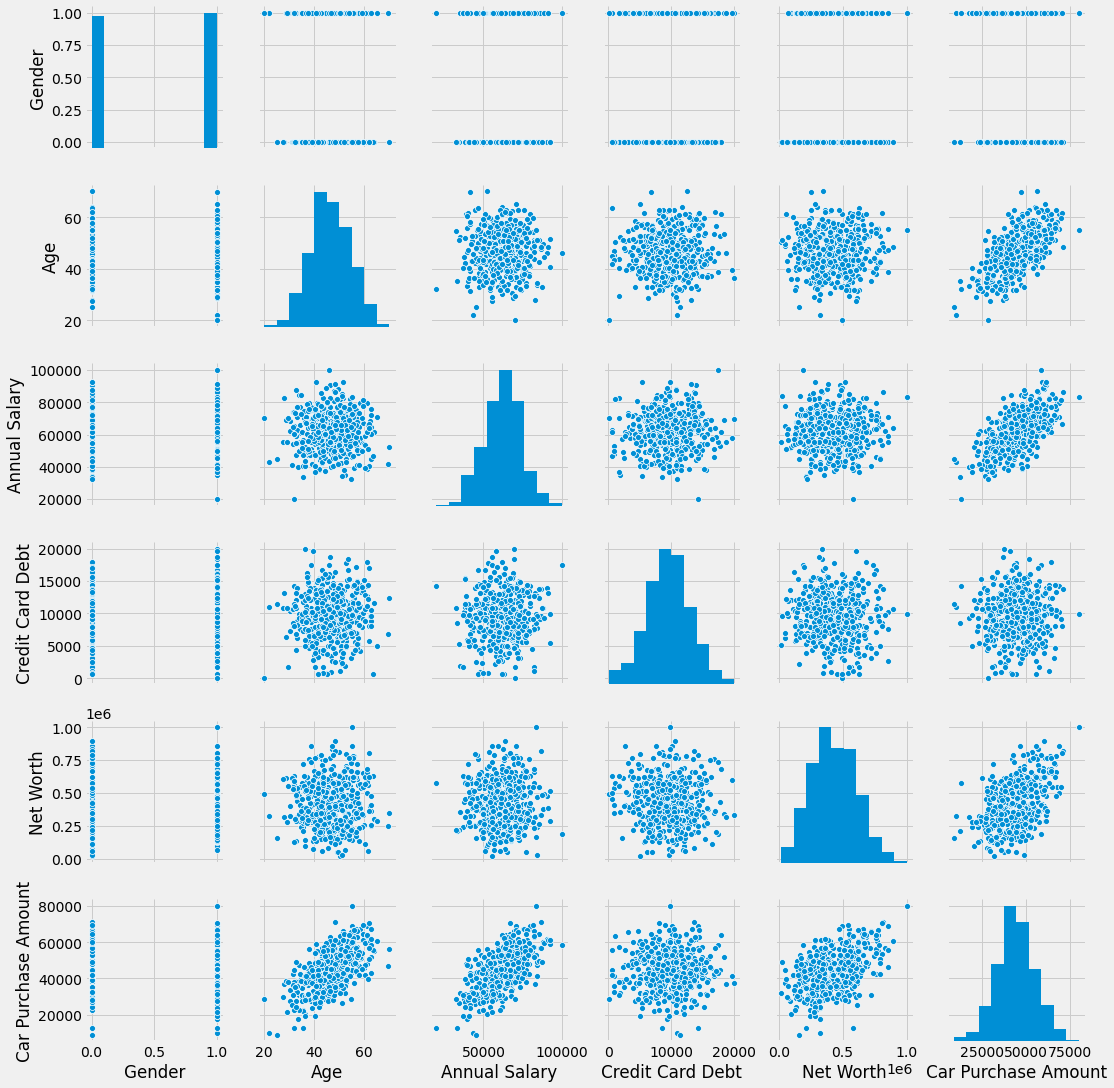

In [8]:
sns.pairplot(df)

# **Create testing and taining Dataset**

In [9]:
df.columns

Index(['Customer Name', 'Customer e-mail', 'Country', 'Gender', 'Age',
       'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount'],
      dtype='object')

In [0]:
df1 = df.drop(['Customer Name','Customer e-mail','Country','Car Purchase Amount'],axis=1)

In [11]:
df1

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016
496,1,37.642000,56039.49793,12301.456790,360419.0988
497,1,53.943497,68888.77805,10611.606860,764531.3203
498,1,59.160509,49811.99062,14013.034510,337826.6382


In [12]:
df1.columns

Index(['Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth'], dtype='object')

In [0]:
df1_out=df['Car Purchase Amount']

In [14]:
df1_out

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: Car Purchase Amount, Length: 500, dtype: float64

In [15]:
df1.shape

(500, 5)

In [16]:
df1_out.shape

(500,)

# **Normalize our Dataset**

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1_scaler = scaler.fit_transform(df1)

In [18]:
df1_scaler.shape

(500, 5)

In [19]:
scaler.data_max_

array([1.e+00, 7.e+01, 1.e+05, 2.e+04, 1.e+06])

In [20]:
scaler.data_min_

array([    0.,    20., 20000.,   100., 20000.])

In [0]:
df1_out=df1_out.values.reshape(-1,1)

In [22]:
df1_out.shape

(500, 1)

In [0]:
df1_out_scaler=scaler.fit_transform(df1_out)

In [24]:
df1_out_scaler

array([[0.37072477],
       [0.50866938],
       [0.47782689],
       [0.82285018],
       [0.66078116],
       [0.67059152],
       [0.28064374],
       [0.54133778],
       [0.54948752],
       [0.4111198 ],
       [0.70486638],
       [0.46885649],
       [0.27746526],
       [0.56702642],
       [0.57056385],
       [0.61996151],
       [0.46217916],
       [0.49157341],
       [0.50188722],
       [0.64545808],
       [0.59339372],
       [0.48453965],
       [0.53860366],
       [0.53007738],
       [0.50814651],
       [0.49841668],
       [0.3966416 ],
       [0.56467566],
       [0.6950749 ],
       [0.49287831],
       [0.12090943],
       [0.50211776],
       [0.80794216],
       [0.62661214],
       [0.43394857],
       [0.60017103],
       [0.42223485],
       [0.01538345],
       [0.37927499],
       [0.64539707],
       [0.51838974],
       [0.45869677],
       [0.26804521],
       [0.2650104 ],
       [0.84054134],
       [0.84401542],
       [0.35515157],
       [0.406

# **Training the Model**

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1_scaler,df1_out_scaler, test_size= 0.25)

In [26]:
x_train.shape

(375, 5)

In [27]:
x_test.shape

(125, 5)

In [28]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

Using TensorFlow backend.


In [0]:
model = Sequential()
model.add(Dense(40, input_dim=5, activation='relu'))
model.add(Dense(40, activation='relu')) 
model.add(Dense(1,activation='linear'))

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                240       
_________________________________________________________________
dense_2 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 41        
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='Adam',
              loss='mean_squared_error')

In [32]:
!nvidia-smi

Tue May 12 22:31:27 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    25W /  70W |    221MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [33]:
batch_size=50
epochs=100
history=model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,
                      verbose=1,validation_split= 0.2)

Train on 300 samples, validate on 75 samples
Epoch 1/100
300/300 [==============================] - 2s 6ms/step - loss: 0.1321 - val_loss: 0.0856
Epoch 2/100
300/300 [==============================] - 0s 70us/step - loss: 0.0606 - val_loss: 0.0362
Epoch 3/100
300/300 [==============================] - 0s 69us/step - loss: 0.0271 - val_loss: 0.0257
Epoch 4/100
300/300 [==============================] - 0s 67us/step - loss: 0.0244 - val_loss: 0.0258
Epoch 5/100
300/300 [==============================] - 0s 65us/step - loss: 0.0209 - val_loss: 0.0180
Epoch 6/100
300/300 [==============================] - 0s 64us/step - loss: 0.0142 - val_loss: 0.0140
Epoch 7/100
300/300 [==============================] - 0s 64us/step - loss: 0.0128 - val_loss: 0.0134
Epoch 8/100
300/300 [==============================] - 0s 63us/step - loss: 0.0118 - val_loss: 0.0116
Epoch 9/100
300/300 [==============================] - 0s 60us/step - loss: 0.0100 - val_loss: 0.0097
Epoch 10/100
300/300 [================

# **Evaluating the model**

In [34]:
history.history.keys()

dict_keys(['val_loss', 'loss'])

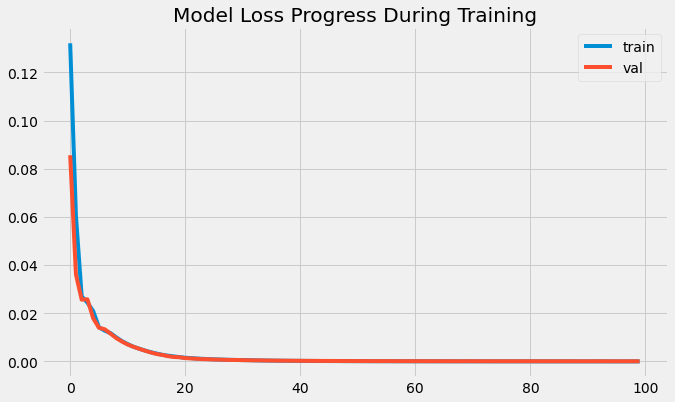

In [35]:
plt.plot(history.history["loss"],label='train')
plt.plot(history.history["val_loss"],label='val')
plt.title("Model Loss Progress During Training")
plt.legend()

In [36]:
df1.columns

Index(['Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth'], dtype='object')

In [0]:
# 'Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth'
x_test1 = np.array([[1, 50, 50000, 10000, 600000]])
prediction = model.predict(x_test1)


In [38]:
print('Expected purchase Amount', prediction)

Expected purchase Amount [[213616.03]]
